# Interconnect Telecom Churn Project

In this project, we are provided with a dataset from a company named Interconnect Telecom. The company wants to understand why the customers churned or stopped their service. We will utilize machine learning to identify features of the data that has high predictive power when determining which customers will churn. 

## Data Information and Preprocessing

In [620]:
## Library Imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from catboost import CatBoostClassifier
import lightgbm as lgb
import xgboost as xgb

In [532]:
# Reading and Loading Data as Panda DataFrames

contract_df = pd.read_csv('datasets/contract.csv')
personal_df = pd.read_csv('datasets/personal.csv')
internet_df = pd.read_csv('datasets/internet.csv')
phone_df = pd.read_csv('datasets/phone.csv')

In [533]:

contract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [534]:
contract_df.sample(5)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6651,2038-YSEZE,2017-09-01,No,Month-to-month,No,Mailed check,67.45,1801.1
6681,1389-CXMLU,2019-08-01,2019-11-01 00:00:00,Month-to-month,No,Electronic check,91.05,289.1
6612,1062-LHZOD,2019-09-01,2019-10-01 00:00:00,Month-to-month,Yes,Mailed check,69.90,69.9
5384,3137-LUPIX,2019-10-01,No,Month-to-month,Yes,Mailed check,64.40,253
1325,7206-GZCDC,2019-10-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,69.25,69.25


Should some `Dtypes` be converted for better performing machine learning models? Can we rename columns?

In [535]:
contract_df.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [536]:
contract_df.duplicated().sum()

0

In [537]:
personal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [538]:
personal_df.isna().sum()

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

In [539]:
personal_df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents
5363,3810-PJUHR,Male,0,Yes,Yes
179,3712-PKXZA,Male,0,Yes,No
5382,6229-UOLQL,Male,0,Yes,Yes
6656,4779-ZGICK,Male,0,Yes,Yes
890,5898-IGSLP,Male,0,Yes,Yes


In [540]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [541]:
internet_df.isna().sum()

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [542]:
internet_df.sample(5)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
5065,2911-IJORQ,DSL,Yes,Yes,Yes,Yes,Yes,Yes
4619,9355-NPPFS,Fiber optic,No,No,No,No,No,Yes
2234,0233-FTHAV,Fiber optic,No,No,Yes,No,No,No
2181,5533-NHFRF,DSL,No,Yes,No,Yes,No,Yes
1177,8898-KASCD,DSL,No,No,Yes,Yes,No,No


In [543]:
phone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [544]:
phone_df.isna().sum()

customerID       0
MultipleLines    0
dtype: int64

In [545]:
phone_df.sample(5)

,customerID,MultipleLines
4259,6305-YLBMM,No
5525,9605-WGJVW,No
132,6440-DKQGE,No
6095,7957-RYHQD,No
5177,5196-SGOAK,No


### Information Analysis:

After an intial look at the datasets, I see that we may need to include some encoding to make our machine learning models perform better. I also see some columns that have inappropriate data types. For instance `TotalCharges` in the `contract_df` dataset. We also should consider merging some columns with the `customerID` column in order to get a clearer insight on individual customers from Interconnect Telecom.

Luckily, in all the datasets, there are no duplicates and there are also no na values.

Let's conduct our EDA.

## EDA

In [546]:
# Changing Data Types

contract_df['TotalCharges'] = pd.to_numeric(contract_df['TotalCharges'], errors='coerce')
contract_df['BeginDate'] = pd.to_datetime(contract_df['BeginDate'])

In [547]:
contract_df.isna().sum()

customerID           0
BeginDate            0
EndDate              0
Type                 0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
dtype: int64

When `TotalCharges` dtype is converted to a numeric value, some NA values appear. We will use the median to fill those NA values.

In [548]:
# Filling in NAN values 

contract_df['TotalCharges'] = contract_df['TotalCharges'].fillna(contract_df['TotalCharges'].median())

In [549]:
# Merging all datasets on customerID

merge_1 = contract_df.merge(personal_df, on='customerID', how='left')
merge_2 = merge_1.merge(phone_df, on='customerID', how='left')
customers_df = merge_2.merge(internet_df, on='customerID', how='left')

In [550]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  MultipleLines     6361 non-null   object        
 13  InternetService   5517 non-null   object        
 14  OnlineSecurity    5517 n

In [551]:
customers_df.sample(5)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
1222,9091-WTUUY,2014-10-01,No,Two year,No,Mailed check,69.25,4447.75,Male,0,Yes,Yes,No,DSL,Yes,No,Yes,Yes,Yes,No
2727,3387-VATUS,2019-06-01,2019-11-01 00:00:00,Month-to-month,Yes,Bank transfer (automatic),94.85,462.80,Male,0,No,No,Yes,Fiber optic,No,No,No,No,Yes,Yes
6820,6300-BWMJX,2015-03-01,No,Month-to-month,No,Electronic check,93.35,5386.50,Female,0,Yes,No,Yes,Fiber optic,No,No,Yes,Yes,Yes,No
986,2604-XVDAM,2019-02-01,No,Month-to-month,No,Bank transfer (automatic),43.80,540.95,Female,0,No,No,No,DSL,No,No,No,No,No,No
5533,9279-CJEOJ,2018-05-01,No,Month-to-month,Yes,Bank transfer (automatic),95.40,2025.10,Female,1,No,No,Yes,Fiber optic,No,No,No,No,Yes,Yes


In [552]:
customers_df.describe()

,MonthlyCharges,TotalCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,64.761692,2281.916928,0.162147
std,30.090047,2265.270398,0.368612
min,18.250000,18.800000,0.000000
25%,35.500000,402.225000,0.000000
50%,70.350000,1397.475000,0.000000
75%,89.850000,3786.600000,0.000000
max,118.750000,8684.800000,1.000000


Performed a successful merge of the datasets on the customerID column. Still need to introduce some encoding and NaN value fillings.

In [553]:
# How many customers canceled their Interconnect Telecom subscription

print((customers_df['EndDate'] == 'No').value_counts())

True     5174
False    1869
Name: EndDate, dtype: int64


In [554]:
retained_customers = (customers_df['EndDate'] == 'No').sum()
canceled_customers = (~(customers_df['EndDate'] == 'No')).sum()

In [555]:
print('Canceled customers %:', (canceled_customers / retained_customers) * 100)

Canceled customers %: 36.122922303826826


In [556]:
# Most Payment by Gender

gender_totals = customers_df.groupby(['gender'])['TotalCharges'].sum()
print(gender_totals)

gender
Female    7959341.575
Male      8112199.350
Name: TotalCharges, dtype: float64


In [557]:
# Average Tenure of a Interconnect Telecom Customer

customers_df['EndDate'] = pd.to_datetime(customers_df['EndDate'], errors='coerce')

customers_df['Tenure'] = (customers_df['EndDate'] - customers_df['BeginDate']).dt.days

canceled_customers = customers_df[customers_df['EndDate'] != 'No']

avg_tenure_cancel = canceled_customers['Tenure'].mean()

print('Average Tenure of customers for Interconnect Telecom in days:', avg_tenure_cancel)

customers_df['Tenure'].describe()

Average Tenure of customers for Interconnect Telecom in days: 547.3520599250936


count    1869.000000
mean      547.352060
std       594.389607
min        30.000000
25%        61.000000
50%       304.000000
75%       883.000000
max      2191.000000
Name: Tenure, dtype: float64

In [558]:
customers_df['Tenure'] = customers_df['Tenure'].fillna(0)
customers_df['EndDate'] = customers_df['EndDate'].fillna(0)

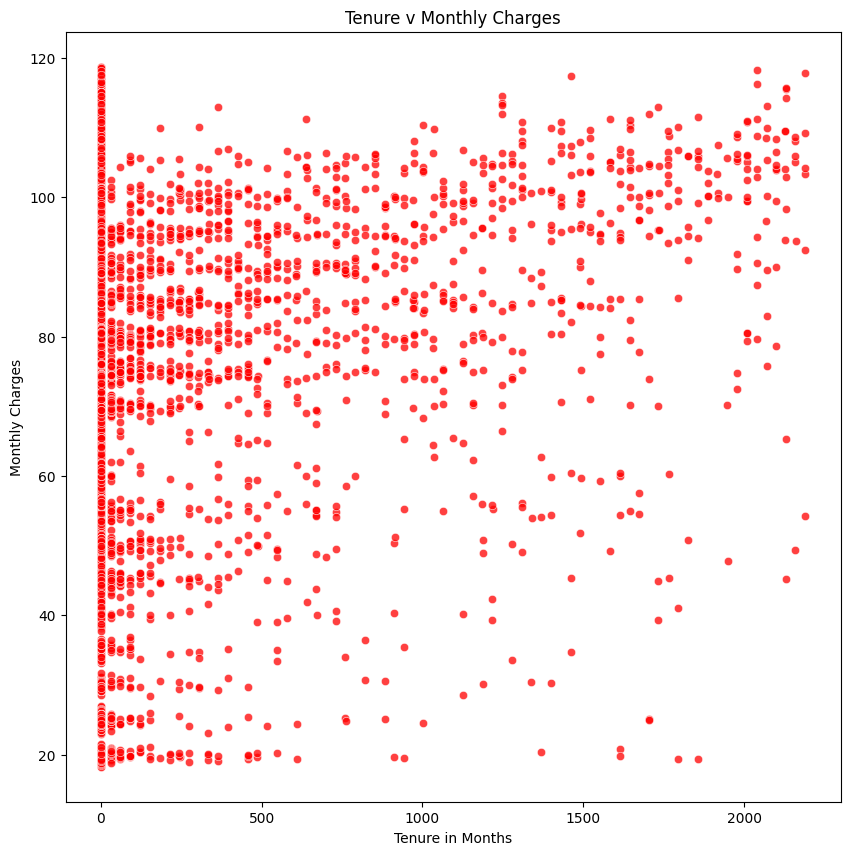

Correlation Coefficient: "0.2528043821880765"


In [559]:
# Scatterplot of Tenure vs Monthly Charges

plt.figure(figsize=(10,10))
sns.scatterplot(x='Tenure', y='MonthlyCharges', data=customers_df, alpha=.75, color='r')
plt.xlabel('Tenure in Months')
plt.ylabel('Monthly Charges')
plt.title('Tenure v Monthly Charges')
plt.show()

corr_coe = customers_df['Tenure'].corr(customers_df['MonthlyCharges'])
print(f'Correlation Coefficient: "{corr_coe}"')

## EDA  Findings :

Once we merged all the datasets on `customerID`, we have some interesting intial findings. 

- There are 7043 rows of data.
- The mean monthly charge for services for each customer is around 65.
- The median monthly charge for services for each customer is 70.
- 36.12% of Interconnect Telecom customers have canceled their subscription services.
- Males tend to play more than Females for services.
- The average tenure for a customer with Interconnect Telecom is about 547 days.
- The median tenure for a customer with Interconnect Telecom is about 304 days.
- Their is a low correlation between Tenure and Monthly Charges for customers. (.25)

From a initial analysis it looks like monthly charges do not correlate with customer tenure. Next we will build a predictive model to determine when a customer will churn. 

### Work Plan for Interconnect Telecom Churn Forecasting

1.  Data Preperation 


 - Read and load data from the given .csv files: `contract.csv`, `personal.csv`, `internet.csv`, `phone.csv`. Make them panda Dataframes.

2. Exploratory Data Analysis (EDA)


 - Conduct a EDA to gain insights into the data, understand the different of variables, and find patterns and trends.


3. Include A Form Of Feature Engineering

 - Create new features that are relevant to the data that will help with enhancing our new predictive model.


4. Select Models


 - Select the appropiate machine learning models that will determine churn prediciton and add a boosting techniques. (Logistic Regression, Random Forest, Gradient Boosting, etc.)


5. Model Training and Evaluation

 - Train the choosen models and use metrics such as AUC-ROC to determine accuracy.


6. Detertmine The Best Performing Model Based on Results

 - After finding the best model, use it to forecast churn for new clients based on the data.


7. Conclusion Report and Visualizations

 - Create a conclusion that summarizes the findings and results from the analysis and models.

## Solution Code

In [560]:
customers_df.isna().sum()

customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
MultipleLines        682
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
Tenure                 0
dtype: int64

In [561]:
def did_not_buy_fill(df, columns):
    did_not_buy = 'Did Not Buy'
    for col in columns:
        df[col] = df[col].fillna(did_not_buy)
    return df
    
columns_to_fill = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies']

customers_df = did_not_buy_fill(customers_df, columns_to_fill)

In [562]:
customers_df.sample(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Tenure
25,6865-JZNKO,2017-08-01,0,Month-to-month,Yes,Bank transfer (automatic),55.30,1530.60,Female,0,...,No,No,DSL,Yes,Yes,No,No,No,No,0.0
2102,2911-WDXMV,2018-08-01,0,Month-to-month,Yes,Credit card (automatic),80.55,1406.65,Male,0,...,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,0.0
3684,2842-BCQGE,2016-07-01,0,Month-to-month,Yes,Credit card (automatic),75.35,3161.40,Male,0,...,No,Yes,Fiber optic,No,No,No,No,No,No,0.0
4162,0769-MURVM,2014-02-01,0,Two year,No,Bank transfer (automatic),65.70,4575.35,Female,0,...,Yes,Did Not Buy,DSL,Yes,Yes,Yes,Yes,Yes,Yes,0.0
1948,8183-ONMXC,2019-10-01,2019-12-01 00:00:00,Month-to-month,No,Electronic check,80.75,159.45,Female,0,...,No,No,Fiber optic,No,No,No,No,No,Yes,61.0
1552,2245-ADZFJ,2017-07-01,0,Two year,No,Bank transfer (automatic),80.55,2471.60,Female,0,...,Yes,Yes,DSL,No,Yes,No,Yes,Yes,Yes,0.0
5361,2495-TTHBQ,2019-10-01,0,One year,Yes,Mailed check,20.40,84.75,Female,0,...,Yes,No,Did Not Buy,Did Not Buy,Did Not Buy,Did Not Buy,Did Not Buy,Did Not Buy,Did Not Buy,0.0
6906,9945-PSVIP,2018-01-01,0,Two year,Yes,Mailed check,18.70,383.65,Female,0,...,Yes,No,Did Not Buy,Did Not Buy,Did Not Buy,Did Not Buy,Did Not Buy,Did Not Buy,Did Not Buy,0.0
5462,9289-LBQVU,2014-10-01,0,One year,Yes,Mailed check,70.15,4480.70,Male,0,...,No,Yes,DSL,No,Yes,No,Yes,No,Yes,0.0
5388,5515-IDEJJ,2019-12-01,2020-01-01 00:00:00,Month-to-month,No,Mailed check,19.90,19.90,Male,0,...,Yes,No,Did Not Buy,Did Not Buy,Did Not Buy,Did Not Buy,Did Not Buy,Did Not Buy,Did Not Buy,31.0


In [563]:
customers_df.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Tenure              0
dtype: int64

In [564]:
#Update Churn Status with 0/1 for model prep.

def churn_update(date):
    if date == 0:
        return 'NO CHURN'
    else:
        return 'CHURN'
    
customers_df['EndDate'] = customers_df['EndDate'].apply(churn_update)

In [565]:
customers_df

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Tenure
0,7590-VHVEG,2020-01-01,NO CHURN,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,...,No,Did Not Buy,DSL,No,Yes,No,No,No,No,0.0
1,5575-GNVDE,2017-04-01,NO CHURN,One year,No,Mailed check,56.95,1889.50,Male,0,...,No,No,DSL,Yes,No,Yes,No,No,No,0.0
2,3668-QPYBK,2019-10-01,CHURN,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,...,No,No,DSL,Yes,Yes,No,No,No,No,61.0
3,7795-CFOCW,2016-05-01,NO CHURN,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,...,No,Did Not Buy,DSL,Yes,No,Yes,Yes,No,No,0.0
4,9237-HQITU,2019-09-01,CHURN,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,...,No,No,Fiber optic,No,No,No,No,No,No,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,NO CHURN,One year,Yes,Mailed check,84.80,1990.50,Male,0,...,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,0.0
7039,2234-XADUH,2014-02-01,NO CHURN,One year,Yes,Credit card (automatic),103.20,7362.90,Female,0,...,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,0.0
7040,4801-JZAZL,2019-03-01,NO CHURN,Month-to-month,Yes,Electronic check,29.60,346.45,Female,0,...,Yes,Did Not Buy,DSL,Yes,No,No,No,No,No,0.0
7041,8361-LTMKD,2019-07-01,CHURN,Month-to-month,Yes,Mailed check,74.40,306.60,Male,1,...,No,Yes,Fiber optic,No,No,No,No,No,No,123.0


In [585]:
#Encoding for model prep

columns_for_onehot = ['PaperlessBilling', 'Type', 'PaymentMethod', 'gender', 'MultipleLines', 'InternetService',
                      'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Partner',
                     'Dependents', 'SeniorCitizen']
data_for_onehot = customers_df[columns_for_onehot].copy()

onehot_encoder = OneHotEncoder()

onehot_encoded_data = onehot_encoder.fit_transform(customers_df[columns_for_onehot])

column_names = []

for i, column in enumerate(columns_for_onehot):
    categories = onehot_encoder.categories_[i]
    column_names.extend([f"{column}_{category}" for category in categories])
    
onehot_encoded_data_df = pd.DataFrame(onehot_encoded_data.toarray(), columns=column_names)

customers_df_encoded = customers_df.drop(columns=columns_for_onehot)

customers_df_encoded = pd.concat([customers_df_encoded, onehot_encoded_data_df], axis=1)

columns_for_onehot_label = ['EndDate']

data_label = customers_df[columns_for_onehot_label].copy()

label_encoder = LabelEncoder()

data_label_encoded = label_encoder.fit_transform(data_label.values.ravel())

customers_df_encoded['EndDate'] = data_label_encoded

In [586]:
#Encoded DF
customers_df_encoded

,customerID,BeginDate,EndDate,MonthlyCharges,TotalCharges,Tenure,PaperlessBilling_No,PaperlessBilling_Yes,Type_Month-to-month,Type_One year,...,StreamingTV_Yes,StreamingMovies_Did Not Buy,StreamingMovies_No,StreamingMovies_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,SeniorCitizen_0,SeniorCitizen_1
0,7590-VHVEG,2020-01-01,1,29.85,29.85,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,5575-GNVDE,2017-04-01,1,56.95,1889.50,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3668-QPYBK,2019-10-01,0,53.85,108.15,61.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,7795-CFOCW,2016-05-01,1,42.30,1840.75,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,9237-HQITU,2019-09-01,0,70.70,151.65,61.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,1,84.80,1990.50,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
7039,2234-XADUH,2014-02-01,1,103.20,7362.90,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
7040,4801-JZAZL,2019-03-01,1,29.60,346.45,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
7041,8361-LTMKD,2019-07-01,0,74.40,306.60,123.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [587]:
encoded_features = customers_df_encoded.drop(['BeginDate', 'customerID', 'EndDate', 'Tenure'], axis=1)
encoded_target = customers_df_encoded['EndDate']

In [588]:
encoded_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   MonthlyCharges                           7043 non-null   float64
 1   TotalCharges                             7043 non-null   float64
 2   PaperlessBilling_No                      7043 non-null   float64
 3   PaperlessBilling_Yes                     7043 non-null   float64
 4   Type_Month-to-month                      7043 non-null   float64
 5   Type_One year                            7043 non-null   float64
 6   Type_Two year                            7043 non-null   float64
 7   PaymentMethod_Bank transfer (automatic)  7043 non-null   float64
 8   PaymentMethod_Credit card (automatic)    7043 non-null   float64
 9   PaymentMethod_Electronic check           7043 non-null   float64
 10  PaymentMethod_Mailed check               7043 no

In [589]:
encoded_target

0       1
1       1
2       0
3       1
4       0
       ..
7038    1
7039    1
7040    1
7041    0
7042    1
Name: EndDate, Length: 7043, dtype: int64

In [590]:
encoded_features.describe()

,MonthlyCharges,TotalCharges,PaperlessBilling_No,PaperlessBilling_Yes,Type_Month-to-month,Type_One year,Type_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,...,StreamingTV_Yes,StreamingMovies_Did Not Buy,StreamingMovies_No,StreamingMovies_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,SeniorCitizen_0,SeniorCitizen_1
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,64.761692,2281.916928,0.407781,0.592219,0.550192,0.209144,0.240664,0.219225,0.216101,0.335794,...,0.384353,0.216669,0.395428,0.387903,0.516967,0.483033,0.700412,0.299588,0.837853,0.162147
std,30.090047,2265.270398,0.491457,0.491457,0.497510,0.406726,0.427517,0.413751,0.411613,0.472301,...,0.486477,0.412004,0.488977,0.487307,0.499748,0.499748,0.458110,0.458110,0.368612,0.368612
min,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.500000,402.225000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,70.350000,1397.475000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,89.850000,3786.600000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [591]:
customers_df['EndDate']

0       NO CHURN
1       NO CHURN
2          CHURN
3       NO CHURN
4          CHURN
          ...   
7038    NO CHURN
7039    NO CHURN
7040    NO CHURN
7041       CHURN
7042    NO CHURN
Name: EndDate, Length: 7043, dtype: object

In [592]:
encoded_target.value_counts()

1    5174
0    1869
Name: EndDate, dtype: int64

In [593]:
features_train, features_test, target_train, target_test = train_test_split(encoded_features, encoded_target, test_size=.4, random_state=12345)
features_train, features_valid, target_train, target_valid = train_test_split(features_train, target_train, test_size=.5, random_state=12345)


In [594]:
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)
print(features_valid.shape)
print(target_valid.shape)
print(features_valid.shape)

(2112, 43)
(2818, 43)
(2112,)
(2818,)
(2113, 43)
(2113,)
(2113, 43)


In [595]:
scaler = StandardScaler()
numeric = ['MonthlyCharges','TotalCharges']
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

/tmp/ipykernel_32/2800076948.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_test[numeric] = scaler.transform(features_test[numeric])
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [601]:
#Upsampling and Downsampling functions

def upsample(features, target, repeat):
    feature_one = features[target == 0]
    feature_zero = features[target == 1]
    target_one = target[target == 0]
    target_zero = target[target == 1]
    
    features_upsampled = pd.concat([feature_zero] + [feature_one] * repeat)
    target_upsampled = pd.concat([target_zero] + [target_one] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
    features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(
    features_train, target_train, 3
)


In [606]:

def downsample(features, target, fraction):
    features_zeros = features[target == 1]
    features_ones = features[target == 0]
    target_zeros = target[target == 1]
    target_ones = target[target == 0]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345), features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345), target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.5)


## Models

In [607]:
# LogisticRegression Model
model = LogisticRegression(random_state=12345,solver='liblinear')
model.fit(features_train,target_train)
predicted_valid = model.predict(features_valid)
print('Accuracy Score:',accuracy_score(target_valid,predicted_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print('ROC-AUC:', auc_roc)

Accuracy Score: 0.8031235210601041
ROC-AUC: 0.8304407859798194


In [608]:
#Upsampled Logistic Regression Model

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled,target_upsampled)
predicted_valid = model.predict(features_valid)
print('Accuracy Score:',accuracy_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print('ROC-AUC:', auc_roc) 

Accuracy Score: 0.7307146237576905
ROC-AUC: 0.82940107393639


In [609]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled,target_downsampled)
predicted_valid = model.predict(features_valid)
print('Accuracy Score:',accuracy_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print('ROC-AUC:', auc_roc) 


Accuracy Score: 0.7714150496923805
ROC-AUC: 0.8312798725438131


### Model Boosting w/ Gradient Boosting and Cross Validaiton

In [615]:
#Gradient Boosting Model
model = GradientBoostingClassifier(learning_rate=.1, n_estimators=150, max_depth=3,
                                   min_samples_split=0.03, random_state=12345)
cv_acc_score = cross_val_score(model, features_valid, target_valid, cv=10, scoring='accuracy', error_score='raise')
cv_f1_score = cross_val_score(model, features_valid, target_valid, cv=10, scoring='f1')
cv_roc_auc_score = cross_val_score(model, features_valid, target_valid, cv=10, scoring='roc_auc')

print('Cross-Validaiton Acc. Score:', cv_acc_score)
print('Cross-Validation F1 Score:', cv_f1_score)
print('Cross-Validaiton ROC-AUC Score:', cv_roc_auc_score)

Cross-Validaiton Acc. Score: [0.77358491 0.77358491 0.79245283 0.80094787 0.78199052 0.81516588
 0.74881517 0.8436019  0.8056872  0.81042654]
Cross-Validation F1 Score: [0.85276074 0.85365854 0.86419753 0.87116564 0.86390533 0.88073394
 0.8338558  0.89846154 0.87833828 0.8757764 ]
Cross-Validaiton ROC-AUC Score: [0.84810127 0.80350445 0.78774027 0.83329353 0.81036542 0.82165605
 0.77329559 0.88770937 0.79087049 0.84731069]


In [616]:
#Model Training with Unsampled Data
model.fit(features_train, target_train)

# Predict Prob. w. Cross-Validation on features_valid
predicted_probabilities = cross_val_predict(model, features_valid, target_valid, cv=5, method='predict_proba')

# Calculate ROC and AUC
fpr,tpr, thresholds = roc_curve(target_valid, predicted_probabilities[:,1])
roc_auc = auc(fpr,tpr)

print(roc_auc)

0.8181418540154599


### Model Boosting w/ Cat Boost 

In [622]:
cat_boost_model = CatBoostClassifier(iterations=200, learning_rate=.1,
                                     depth=6, loss_function='Logloss', random_seed=12345)
cat_boost_model.fit(features_downsampled, target_downsampled)
cat_boost_predict_valid = cat_boost_model.predict(features_valid)

print('Accuracy Score:', accuracy_score(target_valid, cat_boost_predict_valid))

probabilities_valid_cat = cat_boost_model.predict_proba(features_valid)
probabilities_one_valid_cat = probabilities_valid_cat[:,1]
auc_roc_cat = roc_auc_score(target_valid, probabilities_one_valid_cat)

print('ROC-AUC Score:', auc_roc_cat)

0:	learn: 0.6433301	total: 2.11ms	remaining: 420ms
1:	learn: 0.6065832	total: 4.32ms	remaining: 428ms
2:	learn: 0.5766705	total: 6.3ms	remaining: 414ms
3:	learn: 0.5473433	total: 8.3ms	remaining: 407ms
4:	learn: 0.5272888	total: 10.2ms	remaining: 398ms
5:	learn: 0.5137728	total: 12.1ms	remaining: 392ms
6:	learn: 0.5008339	total: 14.1ms	remaining: 388ms
7:	learn: 0.4912472	total: 16ms	remaining: 385ms
8:	learn: 0.4788850	total: 18ms	remaining: 382ms
9:	learn: 0.4680437	total: 19.9ms	remaining: 378ms
10:	learn: 0.4582656	total: 21.9ms	remaining: 376ms
11:	learn: 0.4497178	total: 23.9ms	remaining: 375ms
12:	learn: 0.4435715	total: 25.8ms	remaining: 371ms
13:	learn: 0.4380976	total: 27.7ms	remaining: 368ms
14:	learn: 0.4327646	total: 29.7ms	remaining: 366ms
15:	learn: 0.4271419	total: 31.6ms	remaining: 364ms
16:	learn: 0.4223268	total: 33.5ms	remaining: 361ms
17:	learn: 0.4169600	total: 35.4ms	remaining: 358ms
18:	learn: 0.4123607	total: 37.4ms	remaining: 356ms
19:	learn: 0.4083777	total: 

Accuracy Score: 0.7619498343587316
ROC-AUC Score: 0.8239641234436772


### Model Boosting w/ LightGBM

In [625]:
lgbm_model = lgb.LGBMClassifier(n_estimators=200, learning_rate=.1, max_depth=6, random_state=12345)
lgbm_model.fit(features_downsampled, target_downsampled)
lgbm_predicted_valid = lgbm_model.predict(features_valid)

print('Accuracy Score:', accuracy_score(target_valid, lgbm_predicted_valid))
      
probabilities_valid_lgbm = lgbm_model.predict_proba(features_valid)
probabilities_one_valid_lgbm = probabilities_valid_lgbm[:,1]
auc_roc_lgbm = roc_auc_score(target_valid, probabilities_one_valid_lgbm)
      
print('ROC-AUC Score:', auc_roc_lgbm)

Accuracy Score: 0.7553241836251775
ROC-AUC Score: 0.8168737829704372


### Model Boosting w/ XGBoost

In [626]:
xgb_model = xgb.XGBClassifier(n_estimators=200, learning_rate=.1, max_depth=6, random_state=12345)
xgb_model.fit(features_downsampled,target_downsampled)
xgb_predicted_valid = xgb_model.predict(features_valid)

print('Accuracy Score:', accuracy_score(target_valid, xgb_predicted_valid))

probabilities_valid_xgb = xgb_model.predict_proba(features_valid)
probabilities_one_valid_xgb = probabilities_valid_xgb[:, 1]
auc_roc_xgb = roc_auc_score(target_valid, probabilities_one_valid_xgb)
print('ROC-AUC:', auc_roc_xgb)


/opt/conda/envs/python3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:07:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.7647893989588264
ROC-AUC: 0.8169392812887237


## Random Forest CV

In [629]:
model = RandomForestClassifier(random_state=12345)

param_grid = {'n_estimators': [100, 150, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')

grid_search.fit(features_train,target_train)

best_params = grid_search.best_params_

best_model = grid_search.best_estimator_


predicted_valid = best_model.predict(features_test)

probabilities_one_valid = best_model.predict_proba(features_test)[:, 1]


print('Best Hyperparameters:', best_params)
print('Accuracy Score:', accuracy_score(target_test, predicted_valid))
auc_roc = roc_auc_score(target_test, probabilities_one_valid)
print('ROC-AUC:', auc_roc)

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 150}
Accuracy Score: 0.7934705464868701
ROC-AUC: 0.8313595655487804


# Conclusion

There were many findings after conducting a EDA, SDA, and creating machine learning models to predict and understand why Interconnect Telecom customers churn.

 EDA & SDA Findings:

- There are 7043 rows of data.
- The mean monthly charge for services for each customer is around 65.
- The median monthly charge for services for each customer is 70.
- 36.12% of Interconnect Telecom customers have canceled their subscription services.
- Males tend to play more than Females for services.
- The average tenure for a customer with Interconnect Telecom is about 547 days.
- The median tenure for a customer with Interconnect Telecom is about 304 days.
- Their is a low correlation between Tenure and Monthly Charges for customers. (.25)



Machine Learning Model Results:

- All datasets were merged on the customerID column.
- Once merged, onehot encoding was used to convert categorical values into numerical values to use for models.

    Logistic Regression Model No Boosting:
    - Accuracy Score: 0.8031235210601041
    - ROC-AUC: 0.8304407859798194
    
    Logisitc Regression Model No Boosting Upsampled:
    - Accuracy Score: 0.7307146237576905
    - ROC-AUC: 0.82940107393639
    
    Logisitc Regression Model No Boosting Downsampled:
    - Accuracy Score: 0.7714150496923805
    - ROC-AUC: 0.8312798725438131
    
    Gradient Boosing & Cross Validation:
    - Cross-Validaiton Highest Accuracy Score: 0.8436019 
    - Cross-Validation Highest F1 Score: 0.89846154 
    - Cross-Validaiton Highest ROC-AUC Score: 0.88770937 
    
    CatBoost Model:
    - Accuracy Score: 0.7619498343587316
    - ROC-AUC Score: 0.8239641234436772
    
    LGBM Model:
    - Accuracy Score: 0.7553241836251775
    - ROC-AUC Score: 0.8168737829704372
    
    XGB Model:
    - Accuracy Score: 0.7647893989588264
    - ROC-AUC: 0.8169392812887237
    
    Random Forest w/ Grid Search For Best Hyperparameters:
    - Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 150}
    - Accuracy Score: 0.7934705464868701
    - ROC-AUC: 0.8313595655487804
    
From our results, we see that the model with the highest ROC-AUC score is the Gradient Boosting model with Cross Validaiton with a score of .88. The highest model without any boosting was the Random Forest model with a ROC-AUC score of .83. The most accurate model  was the Gradient Boost model with a accuracy score of .84, the second highest was the Logistic Regression model, .80. 



### Report

1. All steps were completed. We added some encoding to transform categorical values into quantitative values for our machine learning models.

2. Some difficulties that I encountered were transforming all categorical values. When I was running my functions for the downsampling and upsampling there were still some `Yes` and `No` values in the merged dataset.

3. The most key step during this project was transforming the data using onehot encoding and merging the data all into one dataframe in order to use for the machine learning models. Finding the model with the best ROC-AUC score was also very crucial for gaining enough story points. 

4. My final model with the highest quality score was the Gradient Boosting model with a ROC-AUC score of .88. Without boosting the best model was the Random Forest with an ROC-AUC score of .831.
